## Workflow to analyze Photometry data

### Imports

In [1]:
# allow for automatic reloading of classes and function when updating the code
%load_ext autoreload
%autoreload 2 

# Import Session and Experiment class with helper functions
from trialexp.process.data_import import *

### Variables

In [2]:
import pandas as pd

trial_window = [-2000, 6000] # in ms

# time limit around trigger to perform an event
# determine successful trials
timelim = [0, 2000] # in ms

# Digital channel nb of the pyphotometry device
# on which rsync signal is sent (from pycontrol device)
rsync_chan = 2

# if working from the main notebook repo
basefolder, _ = os.path.split(os.getcwd())
# if working from the noncanonical notebook repo (comment if not the case)
basefolder, _ = os.path.split(basefolder)

# These must be absolute paths
# use this to use within package tasks files (in params)
tasksfile = os.path.join(basefolder,'params/tasks_params.csv')
# use this to put a local full path
#tasksfile = -r'C:/.../tasks_params.csv' 

photometry_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\test_folder\photometry'
video_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\videos'
basefolder

'c:\\Users\\phar0732\\Documents\\GitHub\\trialexp'

### Tasks
- A tasks definition file (.csv) contains all the information to perform the extractions of behaviorally relevant information from **PyControl** files, for each **task** file. It includes what are the **triggers** of different trial types, what **events** to extract (with time data), and what are events or printed lines that could be relevant to determine the **conditions** (e.g: free reward, optogenetic stimulation type, etc.)
- To analyze a new task you need to append task characteristics like **task** filename, **triggers**, **events** and **conditions**

In [3]:
tasks = pd.read_csv(tasksfile, usecols = [1,2,3,4], index_col = False)
tasks

,task,triggers,events,conditions
0,lick_go_nogo,go; nogo,bar; bar_off; spout,free_reward
1,lick_go_nogo_unconditionned,go; nogo,bar; bar_off; spout,free_reward
2,lick_go_nogo_unconditionned_opto,go; nogo,bar; bar_off; spout,free_reward
3,reaching_go_nogo,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
4,reaching_go_nogo_jc,CS_plus; CS_minus,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
5,reaching_go_nogo_opto_continuous,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset; s_go_sham; s_go_...
6,reaching_go_nogo_opto_sinusoid,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset_2; s_nogo_cs_onse...
7,reaching_go_nogo_opto_sinusoid_spout,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset_2; s_nogo_cs_onse...
8,reaching_go_nogo_reversal,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
9,reaching_go_nogo_reversal_incentive,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...


### Optional

Transfer Files from hierarchical folders by tasks to flat folders, for photometry and behaviour files

In [ ]:
# photo_root_dir = 'T:\\Data\\head-fixed\\pyphotometry\\data'
# pycontrol_root_dir = 'T:\\Data\\head-fixed\\pycontrol'

# root_folders = [photo_root_dir, pycontrol_root_dir]
# horizontal_folder_pycontrol = 'T:\\Data\\head-fixed\\test_folder\\pycontrol'
# horizontal_folder_photometry = 'T:\\Data\\head-fixed\\test_folder\\photometry'

# copy_files_to_horizontal_folders(root_folders, horizontal_folder_pycontrol, horizontal_folder_photometry)

### Create an experiment object

This will include all the pycontrol files present in the folder_path directory (do not include subdirectories)

In [8]:
root_pycontrol = r'T:\Data\head-fixed\pycontrol'
[sub[0] for sub in os.walk(root_pycontrol)]

['T:\\Data\\head-fixed\\pycontrol',
 'T:\\Data\\head-fixed\\pycontrol\\exp01',
 'T:\\Data\\head-fixed\\pycontrol\\exp01\\task_files',
 'T:\\Data\\head-fixed\\pycontrol\\JC301LS',
 'T:\\Data\\head-fixed\\pycontrol\\JC301LS\\task_files',
 'T:\\Data\\head-fixed\\pycontrol\\pavlovian_nobar_nodelay',
 'T:\\Data\\head-fixed\\pycontrol\\pavlovian_nobar_nodelay\\task_files',
 'T:\\Data\\head-fixed\\pycontrol\\go_rewarding_aversive',
 'T:\\Data\\head-fixed\\pycontrol\\go_rewarding_aversive\\task_files',
 'T:\\Data\\head-fixed\\pycontrol\\train_go_pavlovian',
 'T:\\Data\\head-fixed\\pycontrol\\train_go_pavlovian\\task_files',
 'T:\\Data\\head-fixed\\pycontrol\\ReachTest',
 'T:\\Data\\head-fixed\\pycontrol\\ReachTest\\task_files',
 'T:\\Data\\head-fixed\\pycontrol\\train_Go_CS-US_pavalovian_with_bar_pulses',
 'T:\\Data\\head-fixed\\pycontrol\\train_Go_CS-US_pavalovian_with_bar_pulses\\task_files',
 'T:\\Data\\head-fixed\\pycontrol\\reaching_go_spout_cued_uncued_opto',
 'T:\\Data\\head-fixed\\pyco

In [14]:
tasks

,task,triggers,events,conditions
0,lick_go_nogo,go; nogo,bar; bar_off; spout,free_reward
1,lick_go_nogo_unconditionned,go; nogo,bar; bar_off; spout,free_reward
2,lick_go_nogo_unconditionned_opto,go; nogo,bar; bar_off; spout,free_reward
3,reaching_go_nogo,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
4,reaching_go_nogo_jc,CS_plus; CS_minus,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
5,reaching_go_nogo_opto_continuous,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset; s_go_sham; s_go_...
6,reaching_go_nogo_opto_sinusoid,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset_2; s_nogo_cs_onse...
7,reaching_go_nogo_opto_sinusoid_spout,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset_2; s_nogo_cs_onse...
8,reaching_go_nogo_reversal,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
9,reaching_go_nogo_reversal_incentive,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...


In [17]:
[dir for dir in os.listdir(root_pycontrol) if (os.path.isdir(os.path.join(root_pycontrol,dir))
    and dir in tasks.task.to_list())]

['pavlovian_nobar_nodelay',
 'lick_go_nogo',
 'cued_uncued_oct22',
 'reaching_go_spout_cued_uncued',
 'lick_go_nogo_unconditionned',
 'lick_go_nogo_unconditionned_opto',
 'reaching_go_nogo_opto_continuous',
 'reaching_test',
 'reaching_go_nogo_opto_sinusoid']

In [23]:
pickle_path = r'C:\Users\phar0732\Documents\GitHub\trialexp\outputs\all_flat_flolder_sessions.pkl'
exp = Experiment(pickle_path)

1861

In [68]:
from copy import deepcopy

task_list = ['pavlovian_nobar_nodelay', 'cued_uncued_oct22', 'lick_go_nogo_unconditionned', 'lick_go_nogo']
subjects_subset = [280, 282, 299, 300, 301, 284, 285, 296, 297, 306, 307]

for task in task_list[0:2]:
    exp_copy = deepcopy(exp)
    exp_copy.sessions = [session for session in exp_copy.sessions if (
    session.task_name == task) 
    and (session.photometry_rsync is not None)
    and (session.subject_ID in subjects_subset)]
    exp_copy.by_trial = True
    # exp_copy.set_trial_window([-2000, 6000])
    
    trigs = tasks[tasks.task == task].triggers.values
    trigs = trigs[0].split(';')
    cond_list = []
    cond_aliases = []
    for trig in trigs:
        cond_dict = {'trigger': trig, 'success': True}
        cond_list.append(cond_dict)
        cond_aliases.append(trig + ' hit')
        cond_dict = {'trigger': trig, 'success': False}
        cond_list.append(cond_dict)
        cond_aliases.append(trig + ' miss')
    
    cont_dataset = exp_copy.get_photometry_groups(
        groups = subjects_subset, # or use groups variable defined above
        conditions_list = cond_list, 
        cond_aliases = cond_aliases, 
        when = 'all', 
        task_names = task, #'reaching_go_nogo',
        trig_on_ev = None, # align to the first event of a kind e.g. bar_off
        high_pass = None, 
        low_pass = 45, 
        median_filt = 3,
        motion_corr = True, 
        df_over_f = True, 
        downsampling_factor = 10, 
        export_vars = ['analog_1_df_over_f'], 
        remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
        verbose = True) # will plot all the process of remove_artifacts if remove_artifacts == True
    
    print(task)

    cont_dataset.lineplot(
        vars = ['analog_1_df_over_f'],
        # time_lim = None,
        # time_unit = None,
        ylim =  None,# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
        error = True,
        colormap = 'jet',
        legend = True,
        plot_subjects = True,
        plot_groups = True,
        figsize = (25, 5),
        dpi = 100,
        verbose = False)

Processing subject 299 at: 2022-05-04 11:32:41
condition 0 trials: 77
condition 1 trials: 90
Processing subject 299 at: 2022-05-05 11:55:03
condition 0 trials: 76
condition 1 trials: 114
Processing subject 299 at: 2022-05-06 17:12:52
condition 0 trials: 70
condition 1 trials: 106
Processing subject 300 at: 2022-05-05 10:26:16
condition 0 trials: 83
condition 1 trials: 107
Processing subject 301 at: 2022-05-04 10:05:35
condition 0 trials: 28
condition 1 trials: 136
Processing subject 301 at: 2022-05-06 15:50:15
condition 0 trials: 16
condition 1 trials: 141
Processing subject 306 at: 2022-05-05 11:52:19
condition 0 trials: 51
condition 1 trials: 114
Processing subject 307 at: 2022-05-04 10:00:42
condition 0 trials: 21
condition 1 trials: 143
Processing subject 307 at: 2022-05-06 15:47:34
condition 0 trials: 61
condition 1 trials: 107
pavlovian_nobar_nodelay


IndexError: list index out of range

In [49]:


cond_aliases

['go hit', 'go miss', ' nogo hit', ' nogo miss']

In [38]:
saved_path = r'C:\Users\phar0732\Documents\GitHub\trialexp\outputs\test_save.pkl'
exp_loaded = Experiment(saved_path)

In [ ]:
# Folder of a full experimental batch, all animals included

# Enter absolute path like this
pycontrol_files_path = r'T:\Data\head-fixed\test_folder\pycontrol'

# or this if you want to use data from the sample_data folder within the package
# pycontrol_files_path = os.path.join(basefolder,'sample_data/pycontrol')
# pycontrol_files_path = r'T:\Data\head-fixed\kms_pycontrol'

# Load all raw text sessions in the indicated folder or a sessions.pkl file
# if already existing in folder_path
exp_cohort = Experiment(pycontrol_files_path, verbose=True)

# Only use if the Experiment cohort as been processed by trials before
# TODO: assess whether this can be removed or not
exp_cohort.by_trial = True

In [29]:
from copy import deepcopy
exp_cohort_subset = deepcopy(exp_cohort)

subjects_subset = [280, 282, 299, 300, 301, 284, 285, 296, 297, 306, 307]
# Take only sessions where the task is 'reaching_go_nogo' and which have matching photometry files
exp_cohort_subset.sessions = [session for session in exp_cohort.sessions if (
    session.task_name == 'reaching_go_nogo') 
    and (session.photometry_rsync is not None)
    and (session.files['mp4'] is not [])
    and (session.subject_ID in subjects_subset)]

exp_cohort_subset.by_trial = True

print(len(exp_cohort_subset.sessions))

68


In [ ]:
# Find if there is a matching photometry file:
exp_cohort_subset.match_sessions_to_files(photometry_dir, ext='ppd')

# rsync synchronization pulses matching between behaviour and photometry
exp_cohort_subset.sync_photometry_files(2)

# Find matching videos
exp_cohort_subset.match_sessions_to_files(video_dir, ext='mp4')

# Find matching DeepLabCut outputs files
exp_cohort_subset.match_sessions_to_files(video_dir, ext='h5')

exp_cohort_subset.save()


In [79]:
camera_keyword = 'Side'
vidfile = exp_cohort_subset.sessions[0].files['mp4'][1]
scorer = 'DLC_resnet50_side_2_hands_newobjAug26shuffle1_500000'

In [90]:
exp_cohort_subset.list_vids_to_run_in_dlc()

['\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\videos\\03-15-22_12-50-23.000_JC297PR_Rig_1_Side.mp4',
 '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\videos\\03-15-22_13-43-59.000_JC296LR_Rig_3_Side.mp4',
 '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\videos\\05-30-22_13-00-39.000_JC306LR_Rig_2_Side.mp4',
 '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\videos\\05-30-22_13-00-39.000_JC306LR_Rig_2_Side.mp4',
 '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\videos\\05-31-22_09-55-47.000_JC301LS_Rig_3_Side.mp4',
 '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\videos\\06-22-22_15-35-45.000_JC300LS_Rig_2_Side.mp4',
 '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\videos\\06-22-22_15-41-19.000_JC299LS_Rig_3_Side.mp4',
 '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\videos\\06-23-22_13-01-44.000_JC307LR_Rig_1_Side.mp4',
 '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\videos\\06-23-22_13-06-04.000_JC299LS_Rig_3_Side.mp4',
 '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fi

In [88]:
os.path.dirname(os.path.abspath(__file__))

NameError: name '__file__' is not defined

### Perform extraction of behavioural information by trial

In [ ]:
# Process the whole experimental folder by trials
exp_cohort_subset.process_exp_by_trial(trial_window, timelim, tasksfile, blank_spurious_event='spout', blank_timelim=[0, 65], verbose=True)

# Save the file as sessions.pkl in folder_path
exp_cohort_subset.save()

### Match with photometry, videos, and DeepLabCut files

The following Warning : 

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads...

is due to rsync function for photometry-pycontrol alignment


### Define conditions and groups for extraction

In [38]:
# Defime each trial type as a dictionary of conditions to be met
conditions_dict1 = {'trigger': 'CS_Go', 'valid': True, 'success': True, 'error bar_off': False, 'reward free': False, 'button_press': False}
conditions_dict2 = {'trigger': 'CS_Go', 'valid': True, 'success': False, 'reward free': False, 'button_press': False}
conditions_dict3 = {'trigger': 'CS_Go', 'valid': True, 'success': True, 'error bar_off': True, 'reward free': False, 'button_press': False}
conditions_dict4 = {'trigger': 'CS_NoGo', 'valid': True, 'success': True, 'button_press': False}
conditions_dict5 = {'trigger': 'CS_NoGo', 'valid': True, 'success': False, 'button_press': False}

# Aggregate all condition dictionaries in a list
condition_list = [conditions_dict1, conditions_dict2, conditions_dict3, conditions_dict4, conditions_dict5]
# Aliases for conditions
cond_aliases = ['Go hit', 'Go miss', 'Go hit error', 'NoGo hit', 'NoGo miss']
# Groups as a list of lists
groups = [[280, 282, 299, 300, 301],\
    [284, 285, 296, 297, 306, 307]]
# Window to exctract (in ms)
trial_window = [-2000, 6000]

Example in progress for Cued-Uncued

### Limit the Experiment group by only including a subset of sessions in a copied object

### Extract Photometry trials and create a Continuous_Dataset

In [ ]:
cont_dataset = exp_cohort_subset.get_photometry_groups(
        groups = groups, # or use groups variable defined above
        conditions_list = condition_list, 
        cond_aliases = cond_aliases, 
        when = 'all', 
        task_names = 'reaching_go_nogo', #'reaching_go_nogo',
        trig_on_ev = 'bar_off', # align to the first event of a kind e.g. bar_off
        high_pass = None, 
        low_pass = 45, 
        median_filt = 3,
        motion_corr = True, 
        df_over_f = True, 
        downsampling_factor = 10, 
        export_vars = ['analog_1_filt','analog_2_filt','analog_1_df_over_f'], 
        remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
        verbose = True) # will plot all the process of remove_artifacts if remove_artifacts == True

# cont_dataset.set_trial_window(trial_window, 'ms')


In [91]:
cont_dataset.conditions

NameError: name 'cont_dataset' is not defined

### Save Photometry Dataset

In [40]:
folder_path = r'C:\Users\phar0732\Documents\GitHub\trialexp\outputs'
cont_dataset.save(folder_path, 'photo_reaching_go_nogo_mf3_lp45_bar_off')

Dataset saved in C:\Users\phar0732\Documents\GitHub\trialexp\outputs\photo_reaching_go_nogo_mf3_lp45_bar_off.pkl
data size is 131.25013732910156 Mb


### Reload a pre-existing dataset

In [92]:
dataset_full_path = r'C:\Users\phar0732\Documents\GitHub\trialexp\outputs\photo_reaching_go_nogo_mf3_lp45_bar_off.pkl'
cont_dataset = load_dataset(dataset_full_path)

In [93]:
cont_dataset_copy = deepcopy(cont_dataset)

### Cluster trials to exclude artifacts

Estimated number of clusters: 1
Estimated number of noise points: 148
Silhouette Coefficient: 0.855
samples per cluster:   0    7020
-1     148
dtype: int64


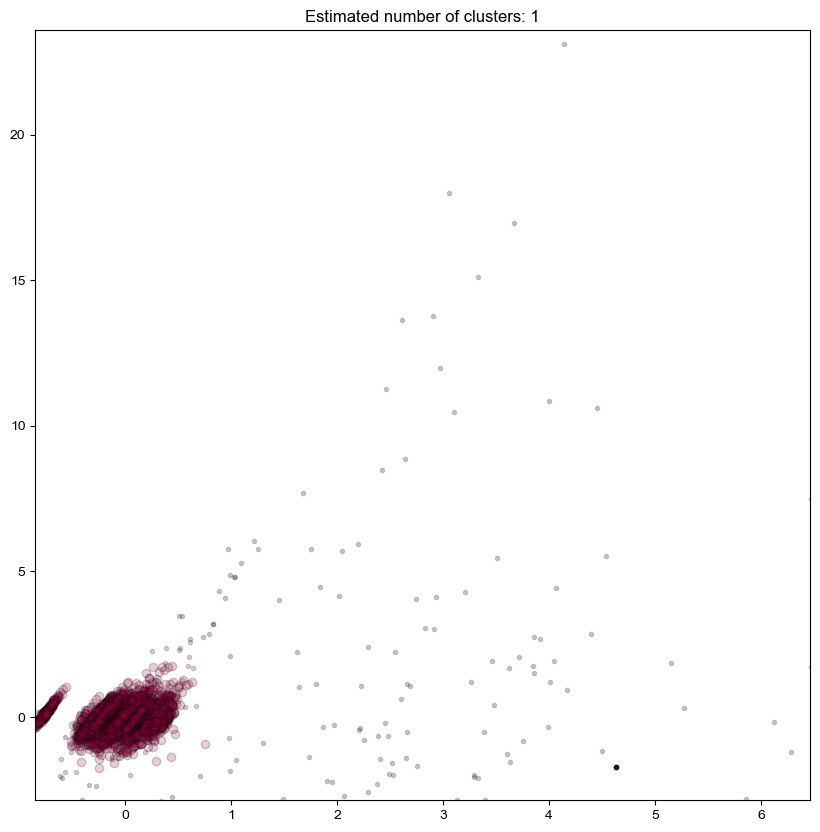

In [101]:
cont_dataset_copy.cluster_trials(
            vars_to_cluster_on = 'analog_2_filt',  # only work with one var for now.
            dim_reduc_type = 'PCA',
            eps =  1,
            min_samples_by_cluster = 20, 
            plot = True,
            plot_lim_pctile = 0.1
            )
        

### Plot the different clusters of trials

In [95]:
cont_dataset.plot_clustered_trials(
    vars_to_plot = ['analog_2_filt','analog_1_df_over_f'],
    min_cluster_size_to_plot = 1,
    ylims = [[-0.1,0.8],[-0.15,0.4]],
    figsize = (15,10)
    )

Exception: Clustering not performed on this dataset, use <cont_dataset>.cluster_trials() method

### Eliminate outliers from the dataset

In [103]:
cont_dataset_copy.delete_artifact_trials()

folder_path = r'C:\Users\phar0732\Documents\GitHub\trialexp\outputs'
cont_dataset_copy.save(folder_path, 'photo_reaching_go_nogo_mf3_lp45_bar_off_outliers_removed')

removed 0 outliers trials from the dataset 
             7020 trials remaining
Dataset saved in C:\Users\phar0732\Documents\GitHub\trialexp\outputs\photo_reaching_go_nogo_mf3_lp45_bar_off_outliers_removed.pkl
data size is 128.54017639160156 Mb


### Optional methods

In [80]:
# Get a list of the groups
cont_dataset.get_groups()
# Get a list of the variables
cont_dataset.get_col_names()

# reset previous filtering of the dataset
cont_dataset.filter_reset()

# exclude some conditions by IDs
cont_dataset.filterout_conditions([])

# exclude some groups by IDs
cont_dataset.filterout_groups([])

# exclude some subjects
cont_dataset.filterout_subjects([0,1, 52])
#     subjects_IDs_to_exclude = [289, 290, 293, 294, 295, 299, 301, 303, 304, 305, 306])

# filter subjects/sessions with less than x trials (by condition)
# cont_dataset.filter_min(min_trials = 7)

# Keep only last n sessions
cont_dataset.filter_lastNsessions(n = 3)

# Filter artifacted trials
# cont_dataset.filterout_clusters([-1, 1, 2]) # Good cluster is classically 0

# Exclude sessions by dates
# cont_dataset.filterout_dates(days_to_exclude = )

# To remove subjects who do not have
# trials in all the conditions
# Careful when using on sessions when not all conditions are present, 
# it could exclude a big number of whole sessions
# cont_dataset.filter_if_not_in_all_cond()


### Plot the photometry by condition

True    7168
Name: keep, dtype: int64

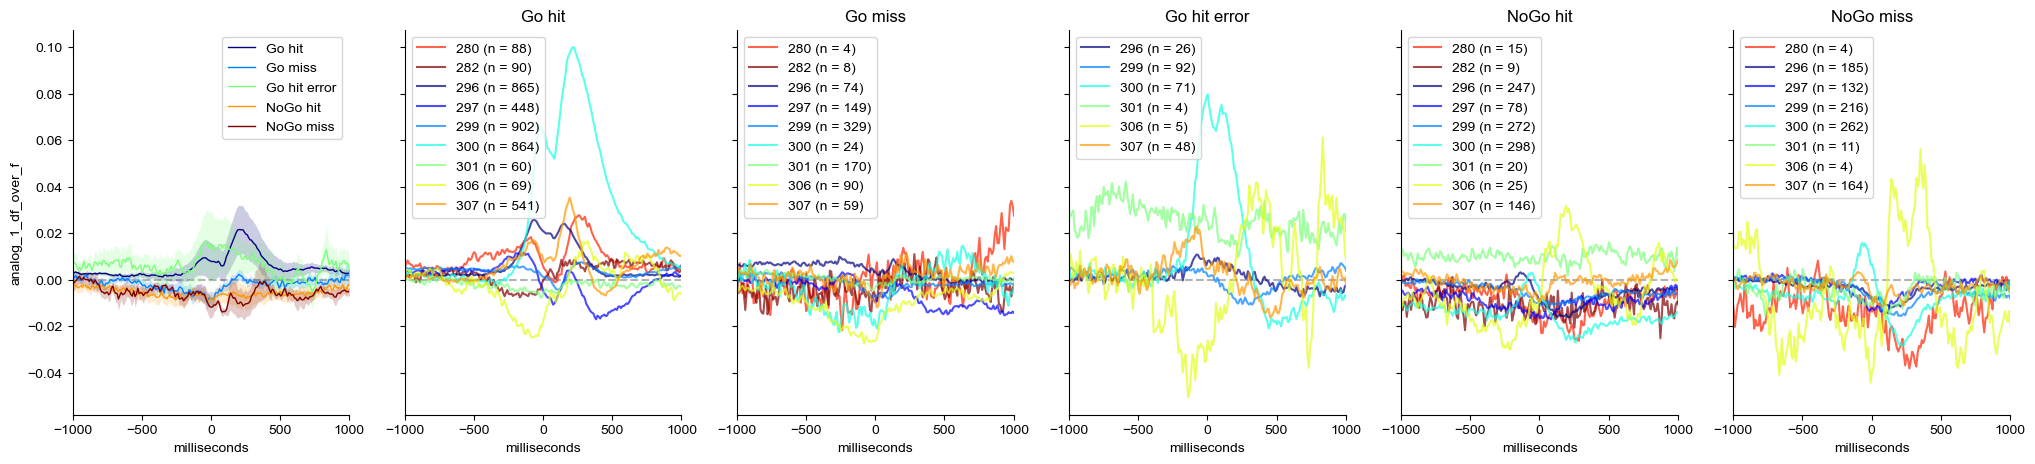

In [96]:
# if this was not set at creation
cont_dataset_copy.set_trial_window([-2, 6], 's')

cont_dataset_copy.lineplot(
    vars = ['analog_1_df_over_f'],
    time_lim = [-1000, 1000],
    time_unit = 'milliseconds',
    ylim =  None,# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    error = True,
    colormap = 'jet',
    legend = True,
    plot_subjects = True,
    plot_groups = True,
    figsize = (25, 5),
    dpi = 100,
    verbose = False)

# Return a count of overall number of trials
cont_dataset.metadata_df['keep'].value_counts()



## Preparing data for model

In [133]:
X, y = cont_dataset_copy.export_to_sktime(
    folder = r'C:\Users\phar0732\Documents\GitHub\trialexp\outputs',
    name = 'reaching_go_nogo',
    vars_to_export = 'analog_1_df_over_f',
    verbose = True)

Nested Dataframe saved in C:\Users\phar0732\Documents\GitHub\trialexp\outputs\reaching_go_nogo.pkl
sktime-format data size: 85.80049133300781 Mb


In [9]:
X, y = load_sktime_dataset(r'C:\Users\phar0732\Documents\GitHub\trialexp\outputs\reaching_go_nogo.pkl')

In [25]:
dataset = load_dataset(
    r'C:\Users\phar0732\Documents\GitHub\trialexp\outputs\photo_reaching_go_nogo_mf3_lp45_bar_off_outliers_removed.pkl')

In [31]:
dataset.data.shape

(7020, 3, 800)

In [45]:
dataset.metadata_df.condition_ID.value_counts()

0    3885
3    1089
4     968
1     835
2     243
Name: condition_ID, dtype: int64

In [36]:
X,y = dataset.export_to_sktime(vars_to_export='analog_1_df_over_f')

In [37]:
X.shape

(7020, 800)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sktime.datatypes import get_examples
from sktime.datatypes import convert

convert(X, from_type="Panel", to_type="Series")
from sktime.datatypes import check_is_mtype

ValueError: Series is not a supported mtype

### Features Extraction

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sktime.pipeline import make_pipeline
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

tsfresh_trafo = TSFreshFeatureExtractor(default_fc_parameters="minimal")
randf = RandomForestClassifier(n_estimators=100)
pipe = make_pipeline(tsfresh_trafo, randf)

In [41]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)
accuracy_score(y_train, y_pred)

C:\Users\phar0732\AppData\Roaming\Python\Python38\site-packages\sktime\datatypes\_panel\_convert.py:712: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _label, _series in multi_ind_dataframe.iteritems():  # noqa
Feature Extraction: 100%|██████████| 5616/5616 [00:04<00:00, 1153.04it/s]
C:\Users\phar0732\AppData\Roaming\Python\Python38\site-packages\sktime\datatypes\_panel\_convert.py:712: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _label, _series in multi_ind_dataframe.iteritems():  # noqa
Feature Extraction: 100%|██████████| 5616/5616 [00:05<00:00, 1088.38it/s]


1.0

In [42]:
y_test_pred = pipe.predict(X_test)
accuracy_score(y_test, y_test_pred)

C:\Users\phar0732\AppData\Roaming\Python\Python38\site-packages\sktime\datatypes\_panel\_convert.py:712: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _label, _series in multi_ind_dataframe.iteritems():  # noqa
Feature Extraction: 100%|██████████| 1404/1404 [00:01<00:00, 1172.40it/s]


0.5548433048433048